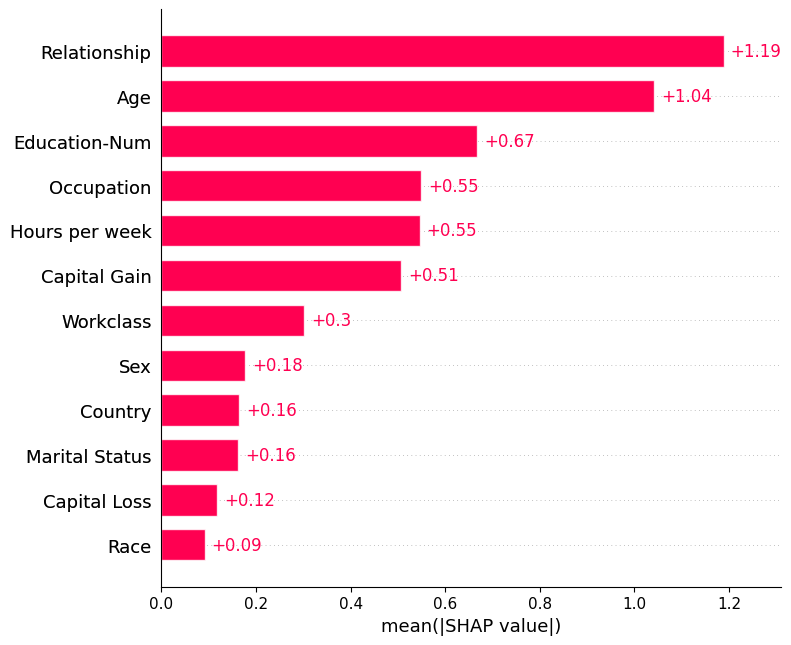

Wrong Prediction Number 74


In [1]:
import xgboost
import shap
# train XGBoost model
# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)


# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=12)

y_binary = [1 if income == True else 0 for income in y]
predict = model.predict(X)
Wrong_pred = []
for i in range(len(predict)):
    if predict[i] != y_binary[i]:
        Wrong_pred.append(i)
print("Wrong Prediction Number",len(Wrong_pred))

In [3]:
# Create a DataFrame for easier manipulation
data = X.copy()
data['income'] = predict


# Find the mean or median values of features for high-income instances
high_income_data = data[data['income'] == 1]
print(len(high_income_data))
general_case_high_income = high_income_data.mean()  # or use .median() for median values

print("General case for high income:")
print(general_case_high_income)

493
General case for high income:
Age                 45.584179
Workclass            4.058824
Education-Num       11.728195
Marital Status       2.068966
Occupation           7.281947
Relationship         3.563895
Race                 3.780933
Sex                  0.855984
Capital Gain      4471.819336
Capital Loss       208.894516
Hours per week      45.894524
Country             36.261663
income               1.000000
dtype: float64


In [3]:
# Find the mean or median values of features for high-income instances
low_income_data = data[data['income'] == 0]
print(len(low_income_data))
general_case_low_income = low_income_data.median()  # or use .median() for median values

print("General case for low income:")
print(general_case_low_income)

1507
General case for low income:
Age               35.0
Workclass          4.0
Education-Num      9.0
Marital Status     2.0
Occupation         7.0
Relationship       3.0
Race               4.0
Sex                1.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    40.0
Country           39.0
income             0.0
dtype: float64


SHAP values for the general case of high income:


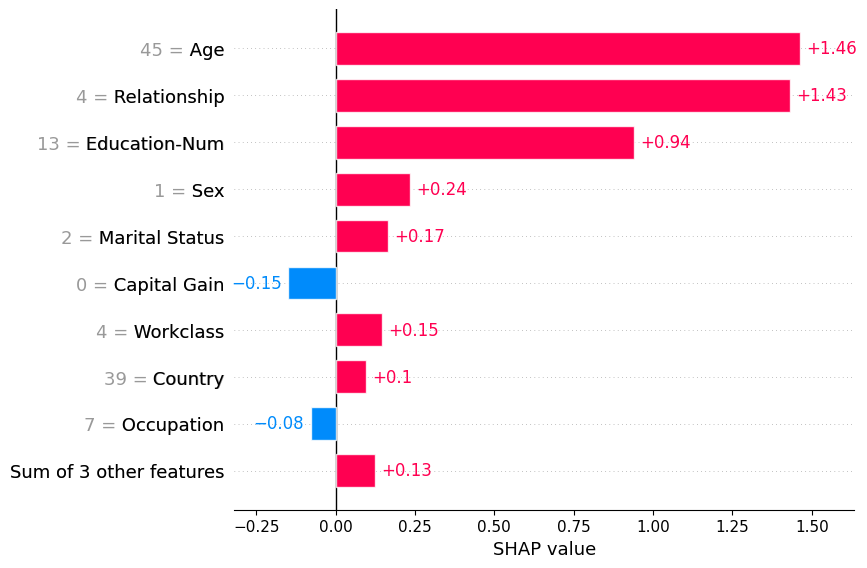

In [4]:
import pandas as pd
# Compute SHAP values for the general case
general_case_shap_values = explainer(pd.DataFrame([general_case_high_income.drop('income')]))

print("SHAP values for the general case of high income:")
shap.plots.bar(general_case_shap_values[0])

SHAP values for the general case of high income:


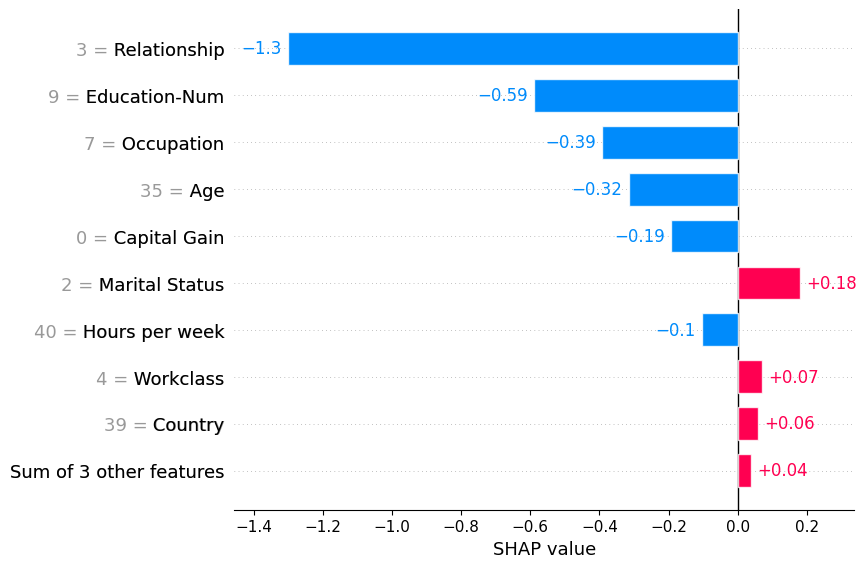

In [6]:
import pandas as pd
# Compute SHAP values for the general case
general_case_low_shap_values = explainer(pd.DataFrame([general_case_low_income.drop('income')]))

print("SHAP values for the general case of high income:")
shap.plots.bar(general_case_low_shap_values[0])

SHAP values for the current instance:


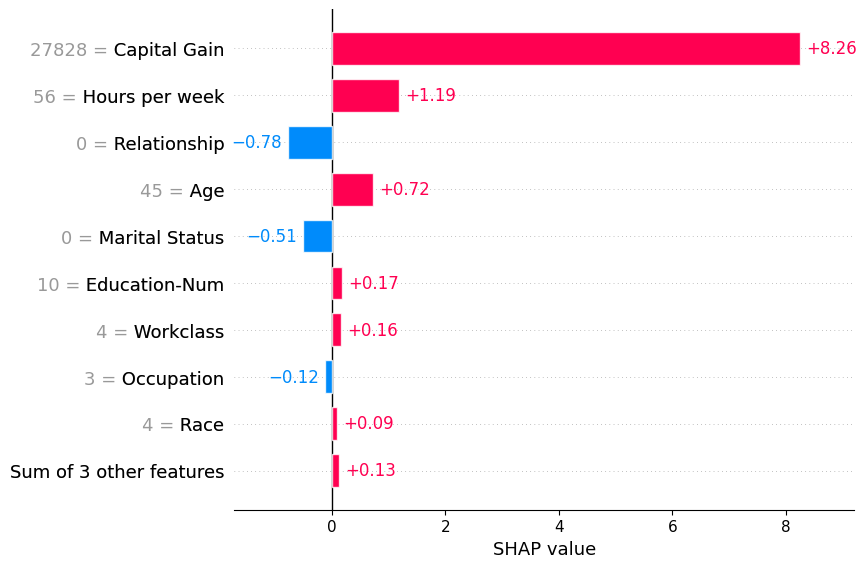

In [12]:
index = 105
current_instance = X.iloc[index]  # Example: first instance
current_shap_values = shap_values[index]
print("SHAP values for the current instance:")
shap.plots.bar(current_shap_values)

In [11]:
general_case_shap_values


.values =
array([[ 1.46426643,  0.14750211,  0.94144352,  0.16509619, -0.07852742,
         1.43008057,  0.07263152,  0.23584135, -0.14968741, -0.01567754,
         0.06824165,  0.09596358]])

.base_values =
array([-3.03414445])

.data =
array([[45.,  4., 13.,  2.,  7.,  4.,  4.,  1.,  0.,  0., 42., 39.]])

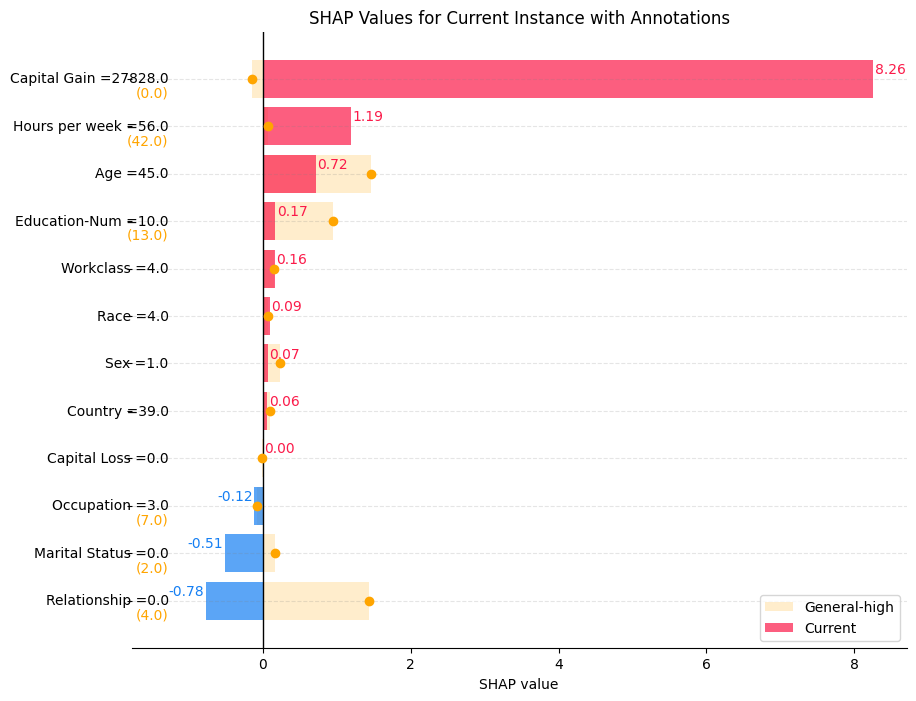

In [13]:
import matplotlib.pyplot as plt
import shap
import pandas as pd
import numpy as np

# Assuming current_shap_values and general_case_shap_values are already defined
# And X is the dataset used for feature columns

# Convert SHAP values to a DataFrame for easier handling
shap_df = pd.DataFrame({
    'feature': X.columns,
    'current_value': current_shap_values.values,
    'general_value': general_case_shap_values.values[0],
    'current_feature_value': current_shap_values.data,
    'general_feature_value': general_case_shap_values.data[0],
})

# Sort by current SHAP values
shap_df = shap_df.sort_values(by='current_value', ascending=False).reset_index(drop=True)

# Define colors for positive and negative SHAP values
colors = ['#FB1A49' if val >= 0 else '#157FF3' for val in shap_df['current_value']]

# Plot SHAP values for the current instance
plt.figure(figsize=(10, 8))

# Plot general SHAP values as a background bar with lower opacity
plt.barh(shap_df['feature'], shap_df['general_value'], color='orange', alpha=0.2, label='General-high')

# Plot current SHAP values
plt.barh(shap_df['feature'], shap_df['current_value'], color=colors, alpha=0.7, label='Current')

# Add a black vertical line at x=0
plt.axvline(x=0, color='black', linewidth=1)

# Add annotations comparing to the general case
for idx, row in shap_df.iterrows():
    plt.scatter([row['general_value']], [idx], color='orange', edgecolors='orange', zorder=5)
    # plt.text(row['general_value'], idx + 0.4, f"{row['general_value']:.2f}", color='orange')

# Add feature values next to the y-axis and on the bars
for idx, row in shap_df.iterrows():
    if row['current_value'] >= 0:
        plt.text(row['current_value'] + 0.02, idx - 0.2, f"{row['current_value']:.2f}", va='center', color='#FB1A49')
    else:
        plt.text(row['current_value'] - 0.02, idx - 0.2, f"{row['current_value']:.2f}", va='center', ha='right', color='#157FF3')

plt.title('SHAP Values for Current Instance with Annotations')
plt.xlabel('SHAP value')

# Create y-axis labels with feature names and corresponding feature values
ax = plt.gca()

min_value = min(shap_df['current_value'].min(), shap_df['general_value'].min())
max_value = max(shap_df['current_value'].max(), shap_df['general_value'].max())
# Set y-tick labels with custom formatting
for i, row in shap_df.iterrows():
    ax.text(min_value -0.5, i, f"{row['feature']} ={row['current_feature_value']:.1f}", va='center', ha='right', color='black', fontsize=10)
    if row['general_feature_value'] != row['current_feature_value']:
        ax.text(min_value -0.5, i + 0.3, f"({row['general_feature_value']:.1f})", va='center', ha='right', color='orange', fontsize=10)
    # ax.text(-2.5, i + 0.3, f"({row['general_feature_value']:.1f})", va='center', ha='right', color='orange', fontsize=10)

# Remove the top, right, and left borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Invert y-axis to have the highest value on top
plt.gca().invert_yaxis()

# Add horizontal grid lines with dashed style
plt.gca().yaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.2)

# Hide the default y-tick labels
ax.set_yticklabels([])

# Adjust x-axis limits
min_value = shap_df['current_value'].min()
plt.gca().set_xlim(left=min_value - 1)

# Show the legend
plt.legend()

plt.show()
